Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
# 1. Import the libraries
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statistical libraries
import phik
from scipy.stats import pearsonr
from scipy.stats import zscore

# feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, classification_report

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [7]:
# Checking for null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
# The last column has only null values and hence we drop it
df.drop(columns = ['_c39'], inplace = True)

In [10]:
# we check for the statistical summary of the dataset
df.describe().round()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,204.0,39.0,546239.0,1136.0,1256.0,1101000.0,501214.0,25126.0,-26794.0,12.0,2.0,1.0,1.0,52762.0,7433.0,7400.0,37929.0,2005.0
std,115.0,9.0,257063.0,612.0,244.0,2297407.0,71702.0,27872.0,28104.0,7.0,1.0,1.0,1.0,26402.0,4881.0,4825.0,18886.0,6.0
min,0.0,19.0,100804.0,500.0,433.0,-1000000.0,430104.0,0.0,-111100.0,0.0,1.0,0.0,0.0,100.0,0.0,0.0,70.0,1995.0
25%,116.0,32.0,335980.0,500.0,1090.0,0.0,448404.0,0.0,-51500.0,6.0,1.0,0.0,1.0,41812.0,4295.0,4445.0,30292.0,2000.0
50%,200.0,38.0,533135.0,1000.0,1257.0,0.0,466446.0,0.0,-23250.0,12.0,1.0,1.0,1.0,58055.0,6775.0,6750.0,42100.0,2005.0
75%,276.0,44.0,759100.0,2000.0,1416.0,0.0,603251.0,51025.0,0.0,17.0,3.0,2.0,2.0,70592.0,11305.0,10885.0,50822.0,2010.0
max,479.0,64.0,999435.0,2000.0,2048.0,10000000.0,620962.0,100500.0,0.0,23.0,4.0,2.0,3.0,114920.0,21450.0,23670.0,79560.0,2015.0


In [30]:
high_variance_list = []
for col in df.columns[:-1]:
    if(df[col].unique().shape[0]/len(df)>0.90):
        high_variance_list.append(col)

In [31]:
# Checking the high variance in the selected features
for col in high_variance_list:
    print(f"{col} : {df[col].unique().shape[0]/len(df)*100:0.3f}")

policy_number : 100.000
policy_bind_date : 95.100
policy_annual_premium : 99.100
insured_zip : 99.500
incident_location : 100.000


The features listed above show a high variance or each data point in the feature is unique and hence doesn't assist in the generalizing the dataset. Hence we drop these features.

In [32]:
df.drop(columns = high_variance_list, inplace = True)

In [33]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,0,MALE,MD,craft-repair,sleeping,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,5000000,MALE,MD,machine-op-inspct,reading,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,5000000,FEMALE,PhD,sales,board-games,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,6000000,FEMALE,PhD,armed-forces,board-games,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,6000000,MALE,Associate,sales,board-games,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [43]:
from pandas.api.types import is_numeric_dtype
numeric_features = [col for col in df.columns[:-1] if is_numeric_dtype(df[col])]
categorical_features = [col for col in df.columns[:-1]  if not (is_numeric_dtype(df[col]))]

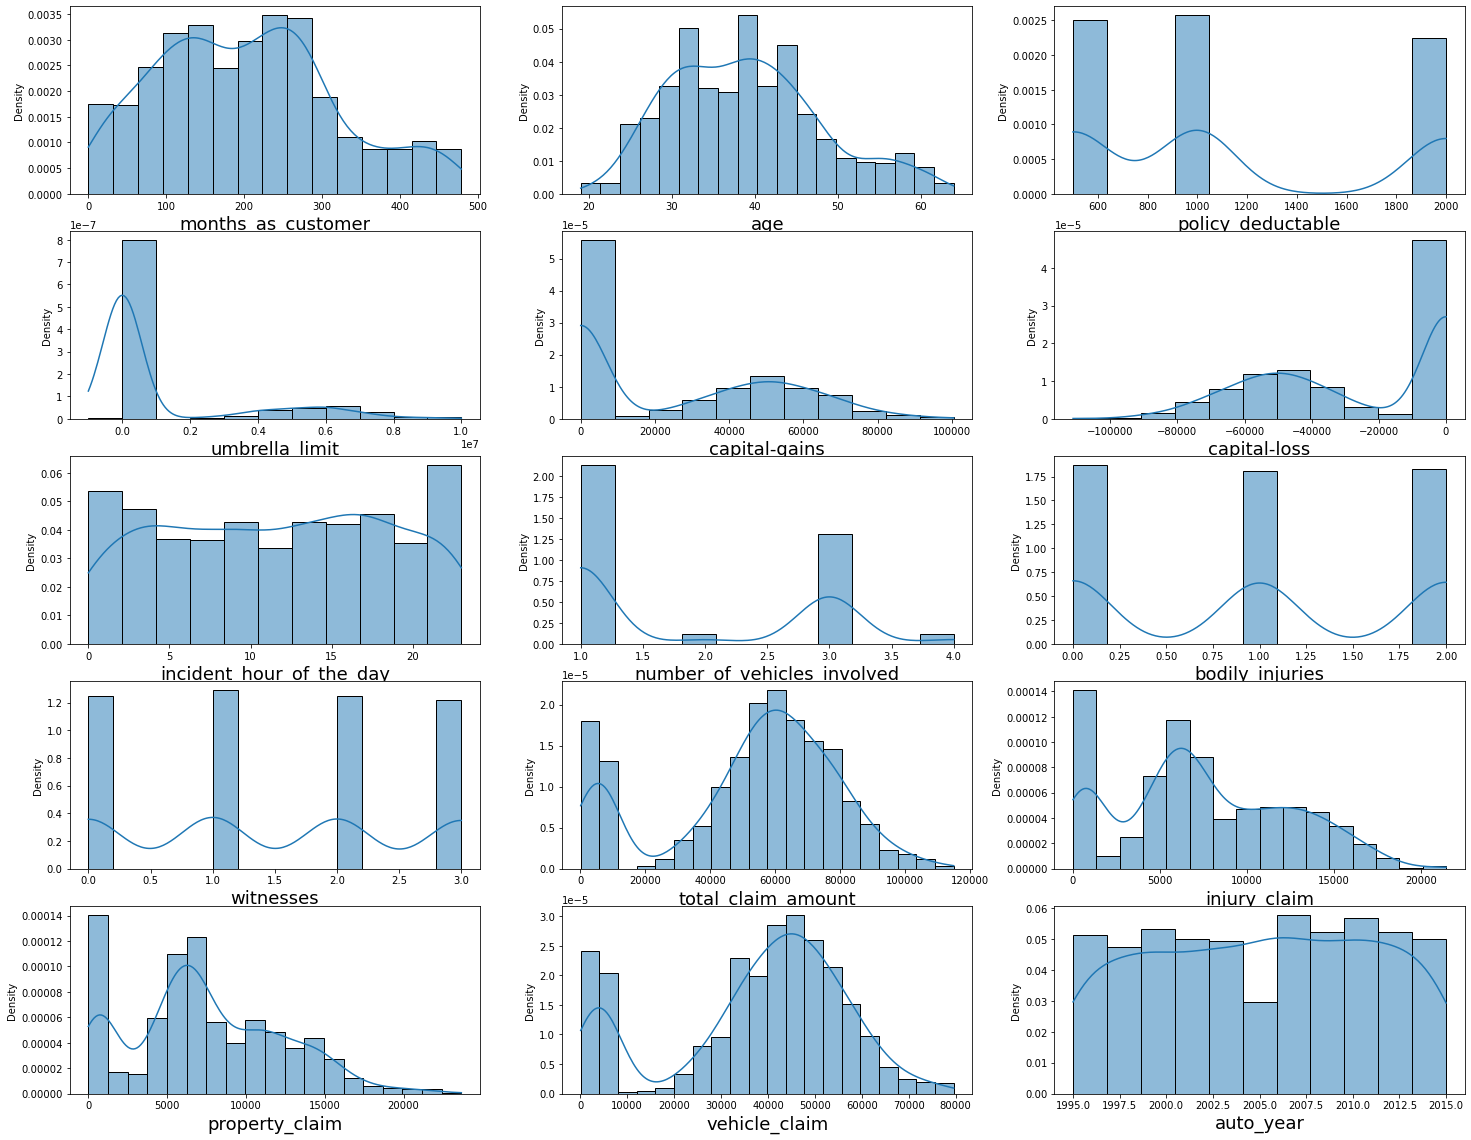

In [46]:
# We plot a histogram of the numerical features
plt.figure(figsize = (25,20))
plotnumber = 1

for col in numeric_features:
    if(plotnumber < 16):
        plt.subplot(5,3,plotnumber)
        sns.histplot(df[col], kde = True, stat = 'density')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()


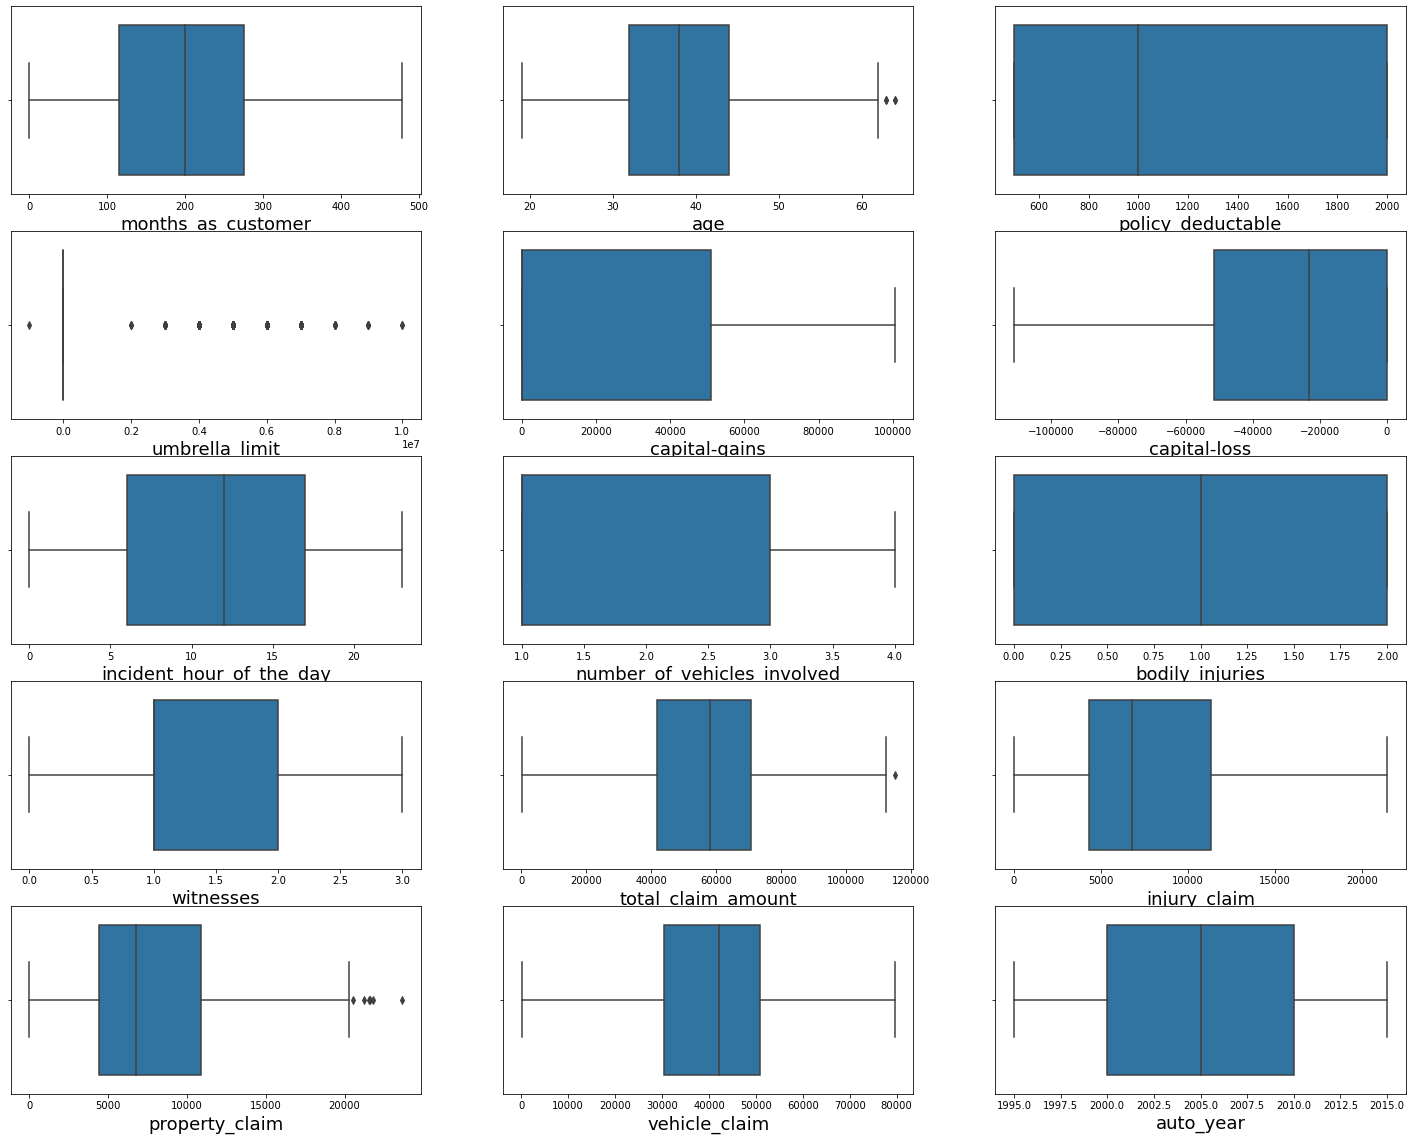

In [55]:
# most of the features are normally distributed however, some seem to have outliers
# we check for outliers using the boxplot
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in numeric_features:
    if plotnumber<16:
        plt.subplot(5,3,plotnumber)
        sns.boxplot(df[col], orient = 'h')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()

'months as customer' and 'property claim' have some outliers 

In [56]:
# attempting to remove the outliers
from scipy.stats import zscore

In [58]:
test = df[(np.abs(zscore(df[numeric_features]))<3).all(axis = 1)]

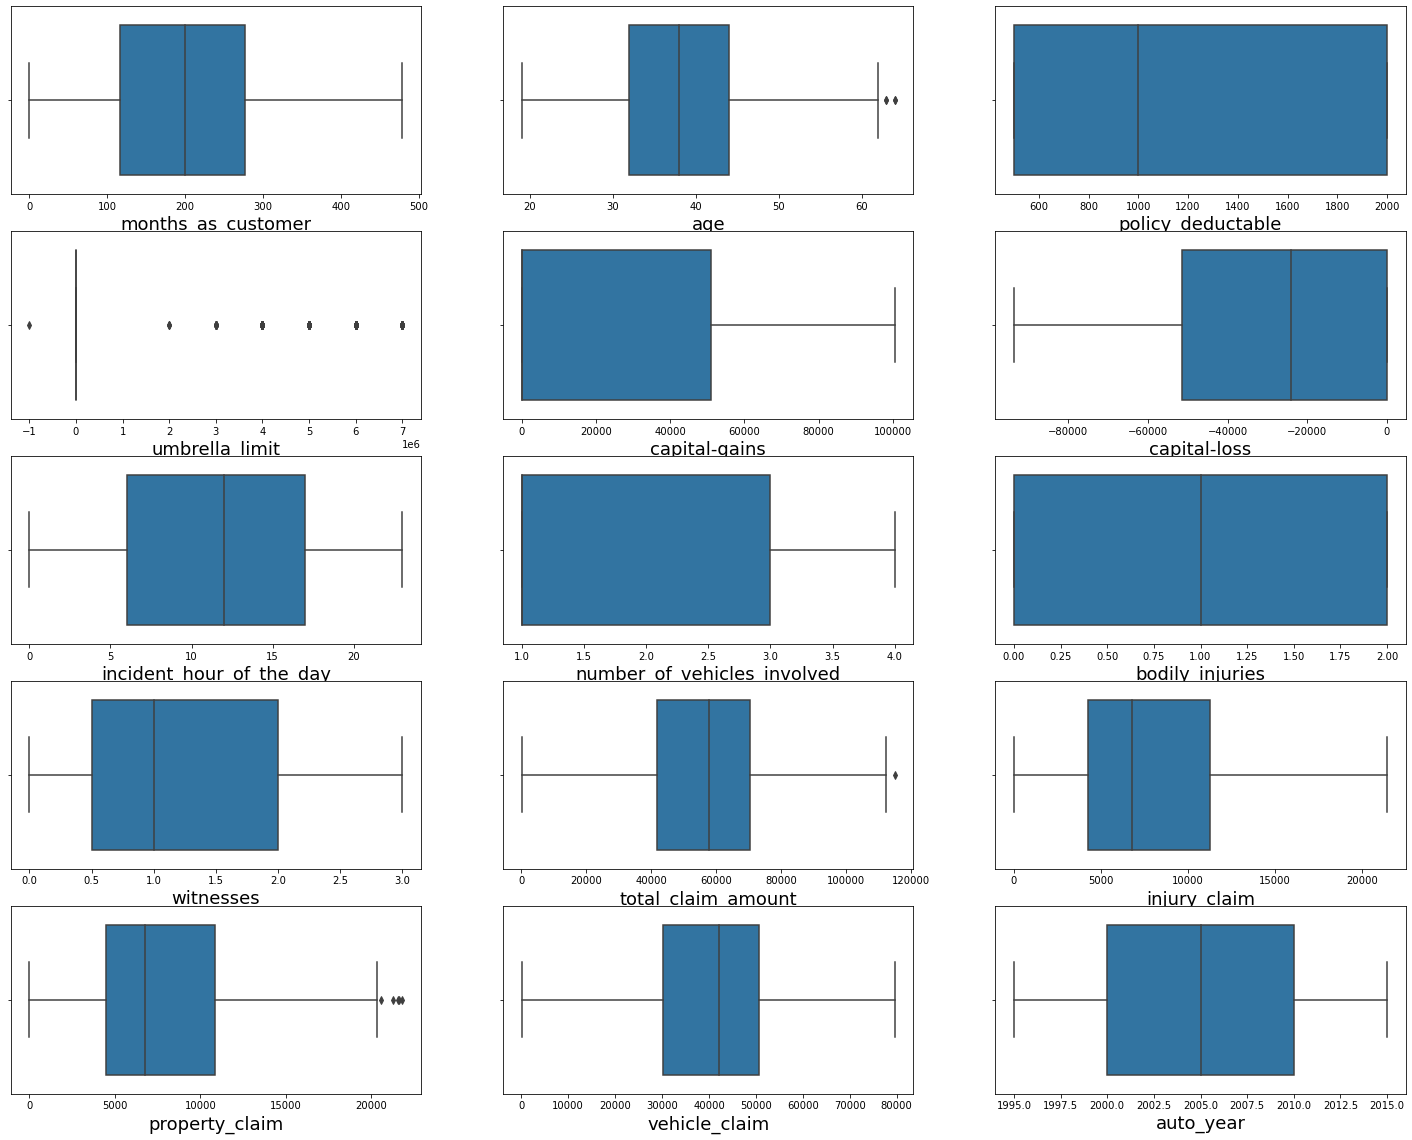

In [64]:
# checking the altered dataset
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in numeric_features:
    if(plotnumber<16):
        plt.subplot(5,3,plotnumber)
        sns.boxplot(test[col], orient = 'h')
        plt.xlabel(col, fontsize = 18)
    plotnumber += 1
plt.show()


In [92]:
# We can attempt using the interquantile range to remove some the outliers from the 
# property_claim feature
q1 = df['property_claim'].quantile(0.25)
q3 = df['property_claim'].quantile(0.75)
iqr = q3 - q1

hi_threshold = q3 + 1.5 * iqr

indices = np.where(df['property_claim'] > hi_threshold)

In [93]:
test = df.drop(index = indices[0])

<AxesSubplot:xlabel='property_claim'>

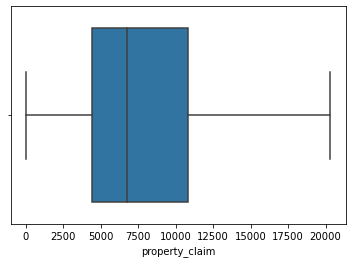

In [94]:
sns.boxplot(test['property_claim'], orient = 'h')

In [95]:
# attempting to remove the outlier from the 'age' feature
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1

hi_threshold = q3 + 1.5 * iqr
indices1 = np.where(df['age'] > hi_threshold)

In [96]:
test = df.drop(index = indices1[0])

<AxesSubplot:xlabel='age'>

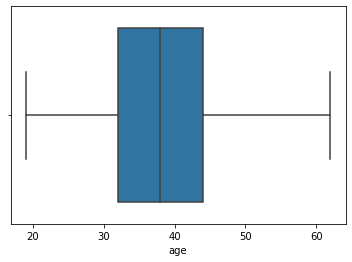

In [97]:
sns.boxplot(test['age'], orient = 'h')

In [98]:
# removing the outliers from the 'total_claim_amount' feature
q1 = df['total_claim_amount'].quantile(0.25)
q3 = df['total_claim_amount'].quantile(0.75)

iqr = q3 - q1

hi_threshold = q3 + 1.5 * iqr

indices2 = np.where(df['total_claim_amount'] > hi_threshold)
test = df.drop(index = indices2[0])

<AxesSubplot:xlabel='total_claim_amount'>

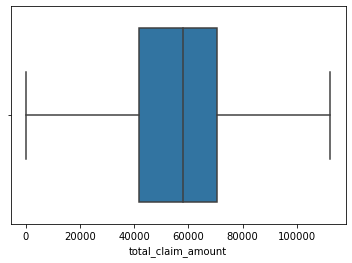

In [99]:
sns.boxplot(test['total_claim_amount'], orient = 'h')

In [113]:
total_indices = indices[0].shape[0] + indices1[0].shape[0] + indices2[0].shape[0]

In [115]:
print(f"Total datapoints lost : {total_indices}")

Total datapoints lost : 11


In [120]:
# Since not too many datapoints are lost with the removal of the outlier points
# we can remove them from the dataset

df.drop(index = indices[0], inplace = True)

In [121]:
df.drop(index = indices1[0], inplace = True)

In [122]:
df.drop(index = indices2[0], inplace = True)

In [127]:
# The final column is the target variable and we encode it 
df['fraud_reported'] = pd.get_dummies(df['fraud_reported'], drop_first = True)

now we use phik to check for the strength of the correlation of the numerical and categorical features with the target variable

In [128]:
import phik

In [144]:
y = df['fraud_reported']


In [149]:
temp = pd.DataFrame()
feature= []
pvalue = []
score  = []

for col in df.columns[:-1]:
    if (is_numeric_dtype(df[col])):
        score.append(phik.phik_from_array(df[col],y, [col]))
        pvalue.append(phik.significance.significance_from_array(df[col], y, [col])[0])
        feature.append(col)
    else:
        score.append(phik.phik_from_array(df[col],y))
        pvalue.append(phik.significance.significance_from_array(df[col],y)[0])
        feature.append(col)

In [150]:
temp = pd.DataFrame()
temp['features'] = features
temp['score'] = score
temp['pvalue'] = pvalue

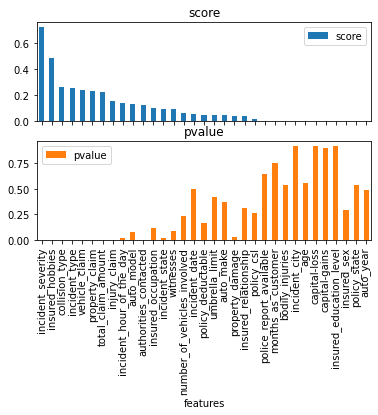

In [160]:
temp.set_index('features', inplace = True)
temp.sort_values('score', ascending = False).plot.bar(subplots = True)
plt.show()

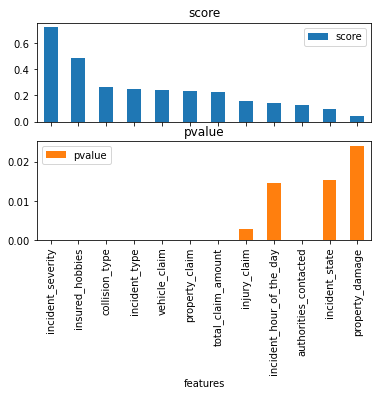

In [164]:
temp[temp['pvalue'] < 0.05].sort_values('score', ascending = False).plot.bar(subplots = True)
plt.show()

In [165]:
temp[temp['pvalue']<0.05].shape

(12, 2)

In [ ]:
only 12 features show high correlation value